## <center>Mempermudah para peneliti dan dokter dalam meneliti persebaran Covid-19 di US

Kelompok-1 :
1. Gunawan Adhiwirya
2. Reyhan Septri Asta
3. Muhammad Figo Mahendra

#### Langkah pertama kami me-import package yang di butuhkan

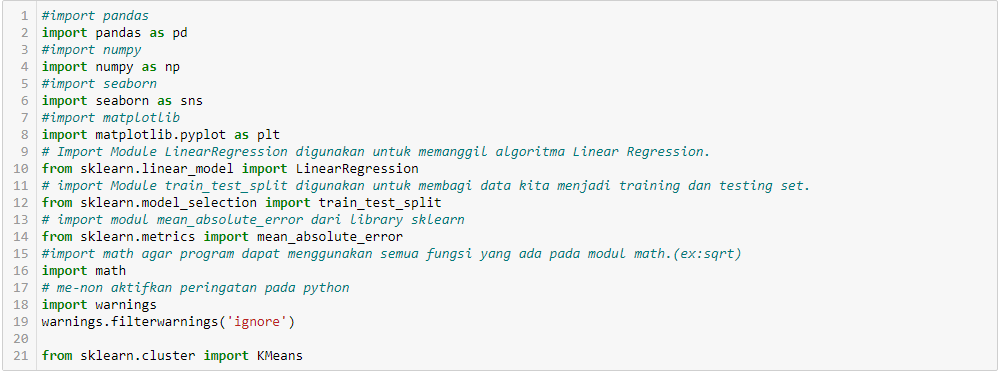

In [1]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import seaborn
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
# Import Module LinearRegression digunakan untuk memanggil algoritma Linear Regression.
from sklearn.linear_model import LinearRegression
# import Module train_test_split digunakan untuk membagi data kita menjadi training dan testing set.
from sklearn.model_selection import train_test_split
# import modul mean_absolute_error dari library sklearn
from sklearn.metrics import mean_absolute_error
#import math agar program dapat menggunakan semua fungsi yang ada pada modul math.(ex:sqrt)
import math
# me-non aktifkan peringatan pada python
import warnings 
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

#### Kemudian load dataset yang akan dipakai

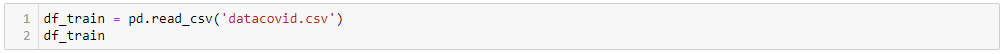

In [2]:
df_train = pd.read_csv('datacovid.csv')
df_train

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,9/1/2021,ND,118491,107475.0,11016.0,536,66.0,1562,NaN,NaN,1,0.0,9/2/2021 13:49,Agree,Not agree
1,7/14/2020,CA,336447,336447.0,0.0,7285,0.0,7039,7039.0,0.0,25,0.0,7/16/2020 0:00,Agree,Agree
2,2/2/2021,IL,1130917,1130917.0,0.0,2304,0.0,21336,19306.0,2030.0,63,16.0,2/3/2021 14:55,Agree,Agree
3,9/19/2021,DE,128253,117969.0,10284.0,450,36.0,1920,1756.0,164.0,0,0.0,9/20/2021 13:47,Agree,Agree
4,6/15/2020,WI,25480,22932.0,2548.0,185,11.0,700,694.0,6.0,2,0.0,6/16/2020 14:10,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39655,7/23/2020,OR,15713,14900.0,813.0,319,6.0,273,269.0,4.0,2,0.0,7/24/2020 14:18,Agree,Agree
39656,11/9/2021,MN,826404,NaN,NaN,7165,1408.0,9006,8365.0,641.0,20,4.0,11/10/2021 15:25,NaN,Agree
39657,7/19/2020,NJ,178541,NaN,NaN,-10,21.0,15706,13732.0,1974.0,34,27.0,7/19/2020 0:00,Not agree,Agree
39658,8/13/2021,FSM,7,7.0,0.0,0,0.0,0,0.0,0.0,0,0.0,8/14/2021 14:46,Agree,Agree


#### Kemudian kita cek shape dari dataset yang di gunakan

In [3]:
df_train.shape

(39660, 15)

#### Lalu kita cek ringkasan dari dataset yang di pakai

count = Jumlah data

mean = Rata - rata

std = Standar Deviasi

min = Nilai Minimum

25% = Adalah Nilai 1/4 dari data tersebut

50% = Adalah Nilai 1/2 dari data tersebut

75% = Adalah Nilai 3/4 dari data tersebut

100% = Adalah Nilai Maksimum

In [4]:
df_train.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,3.966000e+04,2.106500e+04,20993.000000,39660.000000,35656.000000,39660.000000,20893.000000,20893.000000,39660.000000,35595.000000
mean,3.158790e+05,3.417316e+05,42047.262230,1175.015330,179.113445,5923.538704,6746.047336,674.797731,18.881064,1.806967
std,5.737492e+05,5.453048e+05,65238.774412,2549.638385,521.485577,9961.396250,9292.429988,1066.967054,45.931575,28.264329
min,0.000000e+00,0.000000e+00,0.000000,-10199.000000,-10733.000000,0.000000,0.000000,0.000000,-352.000000,-2594.000000
25%,4.693250e+03,3.068800e+04,3.000000,29.000000,0.000000,101.000000,713.000000,0.000000,0.000000,0.000000
50%,9.680900e+04,1.468360e+05,7354.000000,342.000000,3.000000,1745.000000,3344.000000,202.000000,4.000000,0.000000
75%,4.044905e+05,4.772960e+05,59601.000000,1237.000000,139.000000,7496.000000,9279.000000,864.000000,18.000000,1.000000
max,4.972469e+06,4.719596e+06,374472.000000,61016.000000,16591.000000,72288.000000,71408.000000,5208.000000,1178.000000,2919.000000


#### Lalu dilakukan pengecekan apakah data tersebut ada yang kosong atau null

In [5]:
df_train.isnull().sum()

submission_date        0
state                  0
tot_cases              0
conf_cases         18595
prob_cases         18667
new_case               0
pnew_case           4004
tot_death              0
conf_death         18767
prob_death         18767
new_death              0
pnew_death          4065
created_at             0
consent_cases       6615
consent_deaths      5949
dtype: int64

#### Membersihkan data yang memiliki nilai Null

In [6]:
#dikarenakan datanya masih ada yang null maka data yang memiliki nilai NaN akan di drop
df_train.dropna(inplace = True)
df_train

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
1,7/14/2020,CA,336447,336447.0,0.0,7285,0.0,7039,7039.0,0.0,25,0.0,7/16/2020 0:00,Agree,Agree
2,2/2/2021,IL,1130917,1130917.0,0.0,2304,0.0,21336,19306.0,2030.0,63,16.0,2/3/2021 14:55,Agree,Agree
3,9/19/2021,DE,128253,117969.0,10284.0,450,36.0,1920,1756.0,164.0,0,0.0,9/20/2021 13:47,Agree,Agree
4,6/15/2020,WI,25480,22932.0,2548.0,185,11.0,700,694.0,6.0,2,0.0,6/16/2020 14:10,Agree,Agree
5,4/22/2020,CT,22469,21302.0,1167.0,2109,-203.0,1544,1178.0,366.0,121,-5.0,4/22/2020 16:22,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39645,12/30/2020,WY,44133,37798.0,6335.0,210,132.0,405,405.0,0.0,0,0.0,12/31/2020 14:55,Agree,Agree
39651,3/12/2021,KY,420299,321254.0,99045.0,648,244.0,6811,6104.0,707.0,11,0.0,3/14/2021 0:00,Agree,Agree
39654,8/9/2020,FSM,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,8/10/2020 14:23,Agree,Agree
39655,7/23/2020,OR,15713,14900.0,813.0,319,6.0,273,269.0,4.0,2,0.0,7/24/2020 14:18,Agree,Agree


#### Kemudian kita cek tipe-tipe data yang ada pada dataset

In [7]:
#me-cek tipe data 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17341 entries, 1 to 39658
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  17341 non-null  object 
 1   state            17341 non-null  object 
 2   tot_cases        17341 non-null  int64  
 3   conf_cases       17341 non-null  float64
 4   prob_cases       17341 non-null  float64
 5   new_case         17341 non-null  int64  
 6   pnew_case        17341 non-null  float64
 7   tot_death        17341 non-null  int64  
 8   conf_death       17341 non-null  float64
 9   prob_death       17341 non-null  float64
 10  new_death        17341 non-null  int64  
 11  pnew_death       17341 non-null  float64
 12  created_at       17341 non-null  object 
 13  consent_cases    17341 non-null  object 
 14  consent_deaths   17341 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 2.1+ MB


#### Kemudian melakukan pengecekan apakah data tersebut ada yang duplikat

In [8]:
#melihat jika ada data duplikat
df_train.duplicated().sum()

0

#### Lalu data yang sudah di proses sebelumnya di buat visualisasi dengan histogram

array([[<AxesSubplot:title={'center':'tot_cases'}>,
        <AxesSubplot:title={'center':'conf_cases'}>,
        <AxesSubplot:title={'center':'prob_cases'}>],
       [<AxesSubplot:title={'center':'new_case'}>,
        <AxesSubplot:title={'center':'pnew_case'}>,
        <AxesSubplot:title={'center':'tot_death'}>],
       [<AxesSubplot:title={'center':'conf_death'}>,
        <AxesSubplot:title={'center':'prob_death'}>,
        <AxesSubplot:title={'center':'new_death'}>],
       [<AxesSubplot:title={'center':'pnew_death'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

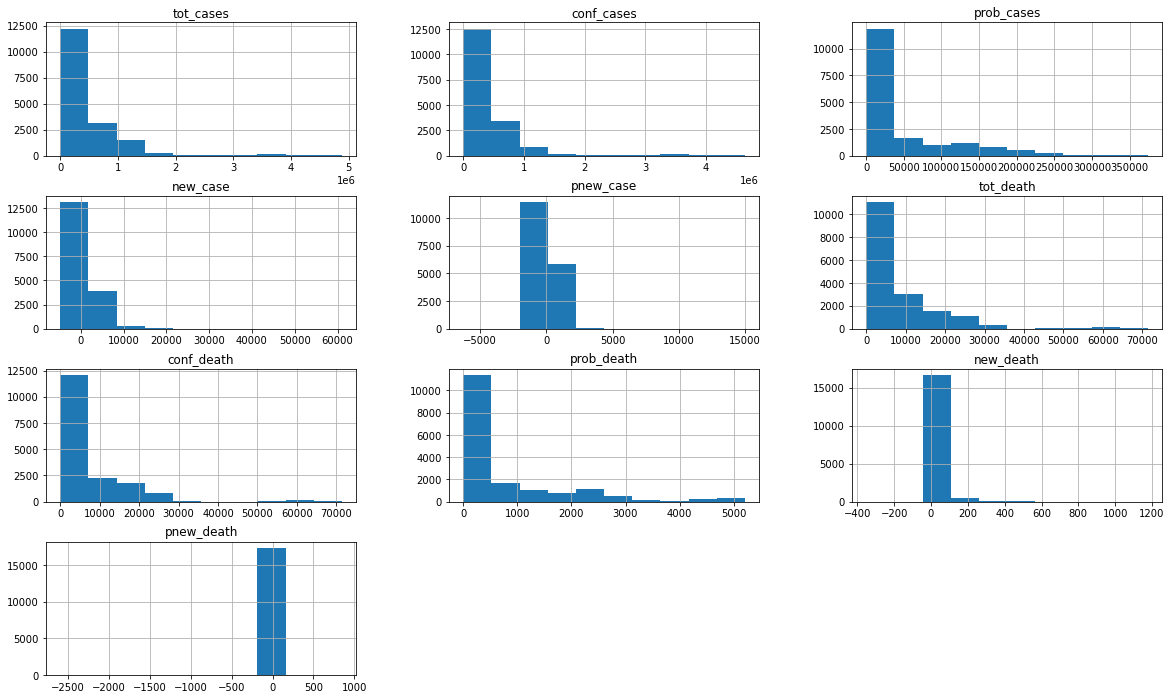

In [9]:
#membuat histogram
df_train.hist(figsize = (20,12))

#### Selanjutnya kita menghapus data yang tidak di perlukan

In [10]:
#dikarenakan kita tidak membutuhkan data pending dalam melakukan visualisasi kita, maka kolom pnew_death, pnew_case di drop
# dan kami memutuskan bahwa data prob_cases, prob_death, dan created_at di drop karena tidak ada hubungannya untuk peneliti dalam membantu meneliti penyebaran Covid
dft=df_train.drop(['pnew_death', 'pnew_case','prob_cases', 'prob_death','created_at'], axis = 1)
dft

,submission_date,state,tot_cases,conf_cases,new_case,tot_death,conf_death,new_death,consent_cases,consent_deaths
1,7/14/2020,CA,336447,336447.0,7285,7039,7039.0,25,Agree,Agree
2,2/2/2021,IL,1130917,1130917.0,2304,21336,19306.0,63,Agree,Agree
3,9/19/2021,DE,128253,117969.0,450,1920,1756.0,0,Agree,Agree
4,6/15/2020,WI,25480,22932.0,185,700,694.0,2,Agree,Agree
5,4/22/2020,CT,22469,21302.0,2109,1544,1178.0,121,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...
39645,12/30/2020,WY,44133,37798.0,210,405,405.0,0,Agree,Agree
39651,3/12/2021,KY,420299,321254.0,648,6811,6104.0,11,Agree,Agree
39654,8/9/2020,FSM,0,0.0,0,0,0.0,0,Agree,Agree
39655,7/23/2020,OR,15713,14900.0,319,273,269.0,2,Agree,Agree


#### Kemudian dilakukan pengecekan data duplikat kembali setelah menghapus data yang tidak digunakan

In [11]:
#pengecekan duplikasi setelah men-drop beberapa data
dft.duplicated().sum()

0

#### Selanjutnya kita mencari korelasi pada data dengan menggunakan visualisasi Heatmap

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'new_case',
       'tot_death', 'conf_death', 'new_death', 'consent_cases',
       'consent_deaths'],
      dtype='object')

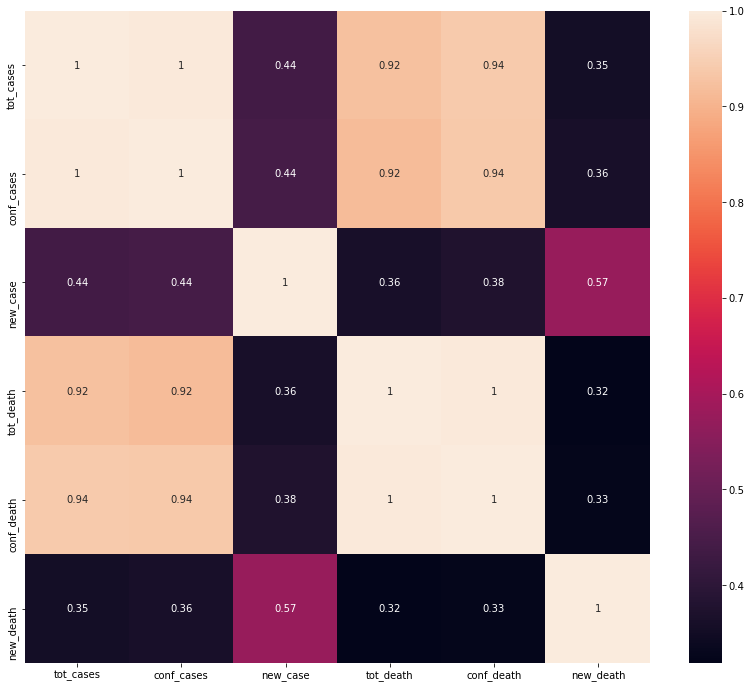

In [12]:
#mencari korelasi dengan menggunakan heatmap
fig , axes = plt.subplots(figsize = (14,12))
sns.heatmap(dft.corr(), annot=True)
dft.columns

Pada gambar diatas data yang memiliki korelasi terbaik adalah data tot_death dengan conf_death dan tot_cases dan conf_cases

Karena kami memiliki 2 nilai korelasi yang sama dan hubungan korelasinya kuat maka dari itu kami memutuskan untuk memilih salah satu korelasi sebagai data yang akan kami uji pada data tersebut yaitu data conf_cases dengan data tot_cases

#### Setelah mendapat data yang ingin digunakan, selanjutnya kita memeriksa apakah ada outlier (pencilan) pada data yang digunakan

In [15]:
#mememeriksa apakah data memiliki outlier(pencilan)
q1 = df_train.iloc[:,[2,3,]].quantile(0.25)
q3 = df_train.iloc[:,[2,3]].quantile(0.75)
IQR = q3 - q1
IQR

tot_cases     575068.0
conf_cases    495178.0
dtype: float64

#### Setelah itu memeriksa data apakah ada outlier (pencilan) dengan menggunakan boxplot

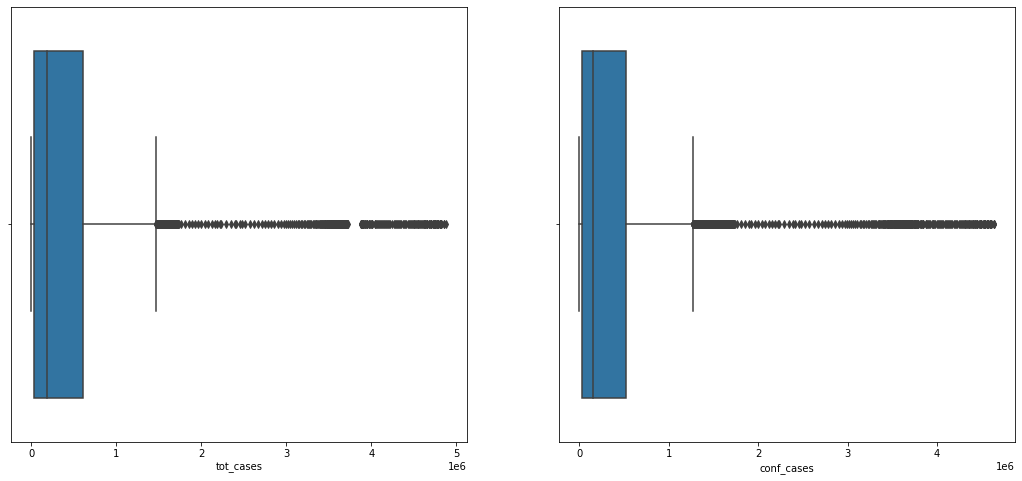

In [16]:
#memeriksa apakah data memiliki outlier(pencilan) dengan menggunakan boxplot
df = df_train.iloc[:,[2,3]]
df.columns

fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (18,8))

for i, ax in zip(df.columns, axes.flat):
    sns.boxplot(x = df[i], ax = ax)
plt.show()

#### Setelah data outlier (pencilan) ditemukan, kita hapus data outliernya

In [17]:
#menghapus data ouliernya
Q1 = (df_train[['tot_cases', 'conf_cases']]).quantile(0.25)
Q3 = (df_train[['tot_cases', 'conf_cases']]).quantile(0.75)
IQR = Q3 - Q1
max = Q3 + (1.5*IQR)
min = Q1 - (1.5*IQR)

Jlebih = (df_train > max)
Jkurang = (df_train < min)
df_train = df_train.mask(Jlebih, max, axis=1)
df_train = df_train.mask(Jkurang, min, axis=1)

#### Setelah data outlier (pencilan) nya sudah di hapus, kita cek sekali lagi untuk memastikan apakah data outlier (pencilan) masih tersisa di dalam data

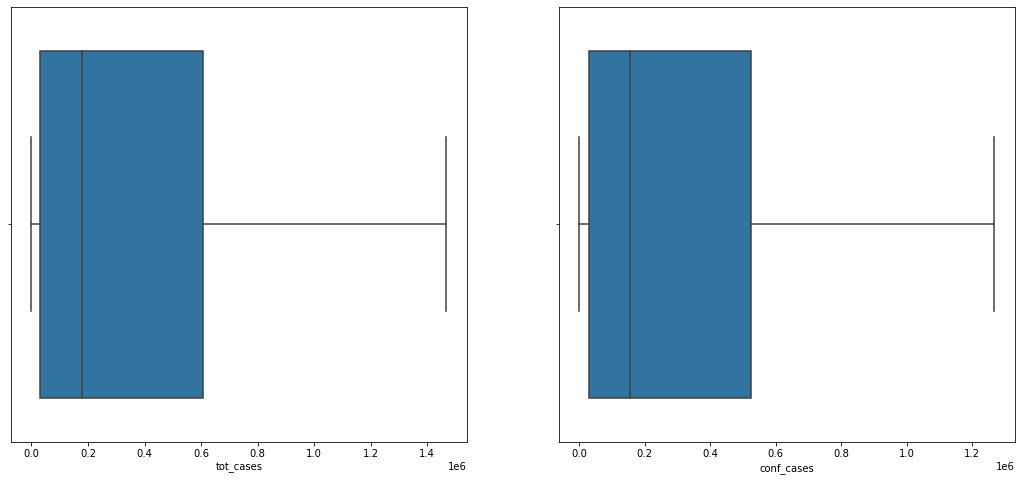

In [18]:
#memeriksa data apakah masih ada outlier setelah dilakukan penghapusan
df = df_train.iloc[:,[2,3]]
df.columns

fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (18,8))

for i, ax in zip(df.columns, axes.flat):
    sns.boxplot(x = df[i], ax = ax)
plt.show()

#### Setelah itu kita akan mengambil 2 data utama yang akan digunakan untuk analisis

In [20]:
dfu=df.head(50)
dfu

,tot_cases,conf_cases
1,336447,336447.0
2,1130917,1130917.0
3,128253,117969.0
4,25480,22932.0
5,22469,21302.0
8,33843,33433.0
10,267337,250915.0
11,98440,92712.0
12,601075,601075.0
15,162909,144162.0


#### Selanjutnya kita visualisasikan prediksi data yang digunakan menggunakan Scatter Plot

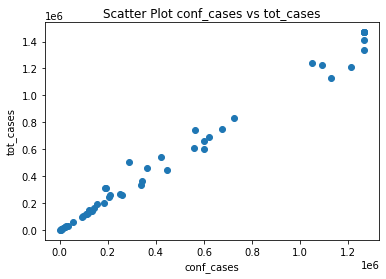

In [21]:
plt.scatter(dfu['conf_cases'],dfu['tot_cases'])
plt.xlabel('conf_cases')
plt.ylabel('tot_cases')
plt.title('Scatter Plot conf_cases vs tot_cases')
plt.show()

In [22]:
x = dfu['conf_cases'].values.reshape(-1,1)
y = dfu['tot_cases'].values.reshape(-1,1)

#### Melihat nilai rata - rata dari Variabel X dan Y

In [23]:
x_mean = np.mean(x)
y_mean = np.mean(y)
print('nilai mean var x: ', x_mean,'\n'
      'nilai mean var y: ', y_mean)

nilai mean var x:  453307.66 
nilai mean var y:  514574.44


#### Kemudian melihat nilai korelasi koefisien pada data

In [24]:
atas = sum((x - x_mean)*(y - y_mean))
bawah = math.sqrt((sum((x - x_mean)**2)) * (sum((y - y_mean)**2)))
correlation = atas/bawah
print('Nilai Correlation Coefficient: ', correlation)

Nilai Correlation Coefficient:  [0.99416166]


#### Melihat Slope pada data

Slope adalah tingkat kemiringan garis

In [25]:
# slope
# Slope adalah tingkat kemiringan garis, intercept 
# adalah jarak titik y pada garis dari titik 0
variance = sum((x - x_mean)**2)
covariance = sum((x - x_mean) * (y - y_mean))
theta_1 = covariance/variance
print('Nilai theta_1: ',theta_1)

Nilai theta_1:  [1.10941586]


Intercept adalah jarak titik y pada garis dari titik 0

In [26]:
# intercept
theta_0 = y_mean - (theta_1 * x_mean)
print('Nilai theta_0: ',theta_0)

Nilai theta_0:  [11667.73160133]


#### Melakukan manual prediksi

In [27]:
# prediction manual
y_pred = theta_0 + (theta_1 * 130)

print(y_pred)

[11811.95566339]


#### Memvisualisasikan prediksi dengan scatter plot

Text(0.5, 1.0, 'Plot conf_cases vs tot_cases')

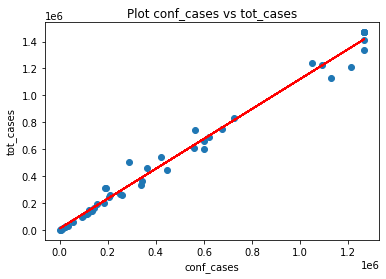

In [28]:
# visualisasi prediksi dengan scatter plot
y_pred = theta_0 + (theta_1 * x)

plt.scatter(x,y)
plt.plot(x, y_pred, c='r')
plt.xlabel('conf_cases')
plt.ylabel('tot_cases')
plt.title('Plot conf_cases vs tot_cases')

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

#### Selanjutnya kita cek regresi koefisien dan intercepnya

In [30]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[[1.09658641]]
[15695.8934773]


#### Mencetak score regresi untuk melihat akurasi

In [31]:
regressor.score(x_test, y_test)

0.9974466910325486

#### Mencetak nilai korelasi dari score regresi

In [32]:
print('Correlation: ', math.sqrt(regressor.score(x_test,y_test)))

Correlation:  0.9987225295509001


#### Memvisualisasikan regresi menggunakan data testing

Text(0.5, 1.0, 'Plot conf_cases vs tot_cases')

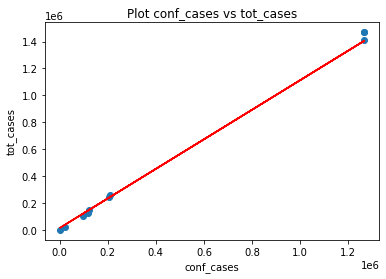

In [33]:
y_prediksi = regressor.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('conf_cases')
plt.ylabel('tot_cases')
plt.title('Plot conf_cases vs tot_cases')

#### Memasukan dataframe ke dalam array kemudian memvisualisasikan dengan menggunakan metode Elbow

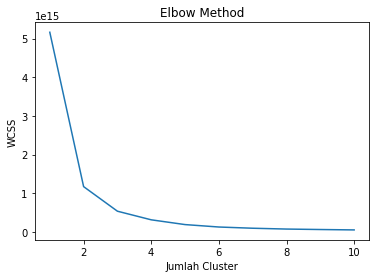

In [34]:
#memasukkan dataframe ke dalam array 
data = np.array(df_train[["conf_cases", "tot_cases"]])
data

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()


Dari hasil Elbow Method diatas dapat di simpulkan bahwa jumlah cluster yang paling optimal dalam melakukan K-Means adalah 2 (dua)

#### Kemudian menentukan jumlah cluster dan centroidnya

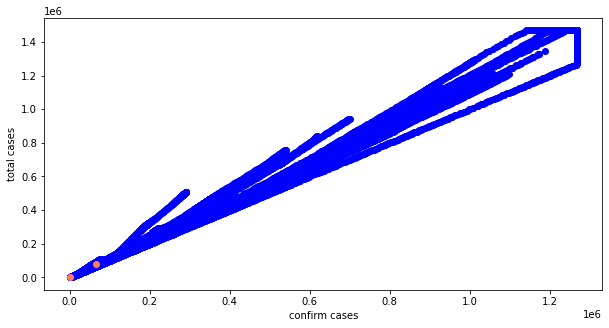

In [35]:
df_cluster = df_train[["conf_cases", "tot_cases"]]

#centroid 
Centroids = (df_cluster.sample(n = 2))
plt.figure(figsize = (10, 5))
plt.scatter(df_cluster["conf_cases"], df_cluster["tot_cases"], color = 'blue')
plt.scatter(Centroids["conf_cases"], Centroids["tot_cases"], color = 'coral')
plt.xlabel('confirm cases')
plt.ylabel('total cases')  
plt.show()

Pada visualiasi Centroid di atas, dapat diketahui bahwa titik centroid tersebut memiliki sifat yang masih acak (random). Oleh karena itu kita melakukan proses pengelompokan dengan menggunakan metode K-Means

#### Kemudian melakukan perhitungan menggunakan K-Means

In [36]:
#K-Means
diff = 1
i = 0

while(diff!=0):
    data_new = df_cluster
    j = 1
    for index1 ,row_c in Centroids.iterrows():
        Y=[]
        for index2,row_d in data_new.iterrows():
            nd1=(row_c['conf_cases']-row_d['conf_cases'])**2
            nd2=(row_c["tot_cases"]-row_d["tot_cases"])**2
            nd=np.sqrt(nd1+nd2)
            Y.append(nd)
        df_cluster[j]=Y
        j=j+1

    hasil=[]
    for index,row in df_cluster.iterrows():
        min_dist=row[1]
        pos=1
        for j in range(2):
            if row[j+1] < min_dist:
                min_dist = row[j+1]
                pos=j+1
        hasil.append(pos)
    df_cluster["Cluster"]=hasil
    Centroids_new = df_cluster.groupby(["Cluster"]).mean()[["conf_cases", "tot_cases"]]
    if i == 0:
        diff=1
        i=i+1
    else:
        diff = (Centroids_new['conf_cases'] - Centroids['conf_cases']).sum() + (Centroids_new["tot_cases"] - Centroids["tot_cases"]).sum()
        print(diff.sum())
    Centroids = df_cluster.groupby(["Cluster"]).mean()[['conf_cases',"tot_cases"]]

575919.2140289962
271925.06803870416
166897.27773183194
62414.231701318844
25435.920983209333
8376.812338868243
2869.894804758107
884.4677689888485
220.33032504811126
221.62453045746952
0.0


#### Menentukan kelompok centroid dan memvisualisasikannya

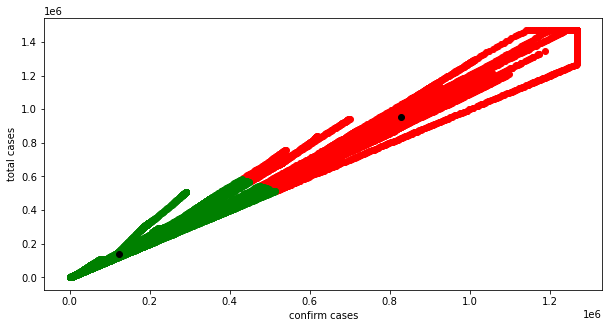

In [37]:
#menentukan kelompok centroid
warna=['red','green','blue']

plt.figure(figsize=(10,5))

for i in range(3):
    df_Model=df_cluster[df_cluster["Cluster"] == i + 1]
    plt.scatter(df_Model['conf_cases'], df_Model ["tot_cases"], color = warna[i])
    
plt.scatter(Centroids['conf_cases'],Centroids["tot_cases"],color='black')
plt.xlabel('confirm cases')
plt.ylabel("total cases")
plt.show()

Dapat dilihat pada Visualisasi di atas bahwa kedua titik Centroid sudah berada pada center (titik tengah) kelompoknya masing- masing, dimana pengelempokannya diberikan visualiasi warna yang berbeda

## Kesimpulan

Pada analisa yang di lakukan pada dataset, bisa disimpulkan bahwa pada hasil preprocessing di dapatkan 2 (dua) hubungan korelasi yang kuat yaitu, conf_cases dan tot_cases. Dimana conf_cases adalah kasus covid di Amerika Serikat yang sudah terkonfirmasi dan tot_cases adalah total kasus yang terjadi di Amerika Serikat. Kemudian pada data korelasi antara conf_death dan tot_death tidak dibutuhkan karena data ini tidak relevan untuk memprediksi perkembangan dan persebaran covid yang ada di USA.

Pada data conf_cases dan tot_cases akan dilakukan clustering dimana clustering tersebut sangat berguna untuk memprediksi dan menganalisa persebaran covid-19 di Amerika Serikat. Pada clustering, jumlah cluster yang optimal digunakan pada K-Means adalah berjumlah 2 (dua). Setelah melakukan proses analisa dengan metode K-means, hasil pengelompokan pada 2 (dua) cluster dapat di visualisasikan.

### Referensi

https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

Tugas Mandiri dan Kelompok SPADA DIKTI